# Introduction to geospatial vector data in Python

In [4]:
%matplotlib inline

import pandas as pd
import geopandas

pd.options.display.max_rows = 10

## Importing geospatial data

Geospatial data is often available from specific GIS file formats or data stores, like ESRI shapefiles, GeoJSON files, geopackage files, PostGIS (PostgreSQL) database, ...

We can use the GeoPandas library to read many of those GIS file formats (relying on the `fiona` library under the hood, which is an interface to GDAL/OGR), using the `geopandas.read_file` function.

For example, let's start by reading a shapefile with all the countries of the world (adapted from http://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-admin-0-countries/, zip file is available in the `/data` directory), and inspect the data:

In [5]:
countries = geopandas.read_file("data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")

AttributeError: module 'geopandas' has no attribute 'read_file'

In [12]:
countries.head()

ValueError: Null geometry supports no operations

ValueError: Null geometry supports no operations

ValueError: Null geometry has no type

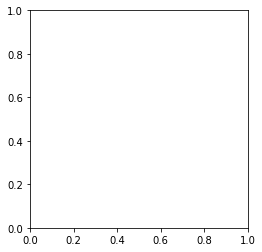

In [13]:
countries.plot()

What can we observe:

- Using `.head()` we can see the first rows of the dataset, just like we can do with Pandas.
- There is a 'geometry' column and the different countries are represented as polygons
- We can use the `.plot()` method to quickly get a *basic* visualization of the data

## What's a GeoDataFrame?

We used the GeoPandas library to read in the geospatial data, and this returned us a `GeoDataFrame`:

In [ ]:
type(countries)

A GeoDataFrame contains a tabular, geospatial dataset:

* It has a **'geometry' column** that holds the geometry information (or features in GeoJSON).
* The other columns are the **attributes** (or properties in GeoJSON) that describe each of the geometries

Such a `GeoDataFrame` is just like a pandas `DataFrame`, but with some additional functionality for working with geospatial data:

* A `.geometry` attribute that always returns the column with the geometry information (returning a GeoSeries). The column name itself does not necessarily need to be 'geometry', but it will always be accessible as the `.geometry` attribute.
* It has some extra methods for working with spatial data (area, distance, buffer, intersection, ...), which we will see in later notebooks

In [14]:
countries.geometry

ValueError: Null geometry supports no operations

In [ ]:
type(countries.geometry)

In [ ]:
countries.geometry.area

**It's still a DataFrame**, so we have all the pandas functionality available to use on the geospatial dataset, and to do data manipulations with the attributes and geometry information together.

For example, we can calculate average population number over all countries (by accessing the 'pop_est' column, and calling the `mean` method on it):

In [ ]:
countries['pop_est'].mean()

Or, we can use boolean filtering to select a subset of the dataframe based on a condition:

In [ ]:
africa = countries[countries['continent'] == 'Africa']

In [ ]:
africa.plot()

---

The rest of the tutorial is going to assume you already know some pandas basics, but we will try to give hints for that part for those that are not familiar.   
A few resources in case you want to learn more about pandas:

- Pandas docs: https://pandas.pydata.org/pandas-docs/stable/10min.html
- Other tutorials: chapter from pandas in https://jakevdp.github.io/PythonDataScienceHandbook/, https://github.com/jorisvandenbossche/pandas-tutorial, https://github.com/TomAugspurger/pandas-head-to-tail, ...

<div class="alert alert-info" style="font-size:120%">
<b>REMEMBER</b>: <br>

<ul>
  <li>A `GeoDataFrame` allows to perform typical tabular data analysis together with spatial operations</li>
  <li>A `GeoDataFrame` (or *Feature Collection*) consists of:
   <ul>
    <li>**Geometries** or **features**: the spatial objects</li>
    <li>**Attributes** or **properties**: columns with information about each spatial object</li>
   </ul>
  </li>
</ul>
</div>

## Geometries: Points, Linestrings and Polygons

Spatial **vector** data can consist of different types, and the 3 fundamental types are:

* **Point** data: represents a single point in space.
* **Line** data ("LineString"): represents a sequence of points that form a line.
* **Polygon** data: represents a filled area.

And each of them can also be combined in multi-part geometries (See https://shapely.readthedocs.io/en/stable/manual.html#geometric-objects for extensive overview).

For the example we have seen up to now, the individual geometry objects are Polygons:

In [ ]:
print(countries.geometry[2])

Let's import some other datasets with different types of geometry objects.

A dateset about cities in the world (adapted from http://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-populated-places/, zip file is available in the `/data` directory), consisting of Point data:

In [ ]:
cities = geopandas.read_file("zip://./data/ne_110m_populated_places.zip")

In [ ]:
print(cities.geometry[0])

And a dataset of rivers in the world (from http://www.naturalearthdata.com/downloads/50m-physical-vectors/50m-rivers-lake-centerlines/, zip file is available in the `/data` directory) where each river is a (multi-)line:

In [ ]:
rivers = geopandas.read_file("zip://./data/ne_50m_rivers_lake_centerlines.zip")

In [ ]:
print(rivers.geometry[0])

### The `shapely` library

The individual geometry objects are provided by the [`shapely`](https://shapely.readthedocs.io/en/stable/) library

In [ ]:
type(countries.geometry[0])

To construct one ourselves:

In [ ]:
from shapely.geometry import Point, Polygon, LineString

In [ ]:
p = Point(1, 1)

In [ ]:
print(p)

In [ ]:
polygon = Polygon([(1, 1), (2,2), (2, 1)])

<div class="alert alert-info" style="font-size:120%">
<b>REMEMBER</b>: <br><br>

Single geometries are represented by `shapely` objects:

<ul>
  <li>If you access a single geometry of a GeoDataFrame, you get a shapely geometry object</li>
  <li>Those objects have similar functionality as geopandas objects (GeoDataFrame/GeoSeries). For example:
   <ul>
    <li>`single_shapely_object.distance(other_point)` -> distance between two points</li>
    <li>`geodataframe.distance(other_point)` ->  distance for each point in the geodataframe to the other point</li>
   </ul>
  </li>
</ul>
</div>

## Plotting our different layers together

In [ ]:
ax = countries.plot(edgecolor='k', facecolor='none', figsize=(15, 10))
rivers.plot(ax=ax)
cities.plot(ax=ax, color='red')
ax.set(xlim=(-20, 60), ylim=(-40, 40))

See the [04-more-on-visualization.ipynb](04-more-on-visualization.ipynb) notebook for more details on visualizing geospatial datasets.

## Let's practice!

For the exercises, we are going to use some data of the city of Paris:

- The administrative districts of Paris (https://opendata.paris.fr/explore/dataset/quartier_paris/): `paris_districts_utm.geojson`
- Real-time (at the moment I downloaded them ..) information about the public bicycle sharing system in Paris (vélib, https://opendata.paris.fr/explore/dataset/stations-velib-disponibilites-en-temps-reel/information/): `paris_sharing_bike_stations_utm.geojson`

Both datasets are provided as GeoJSON files.

Let's explore those datasets:

<div class="alert alert-success">
 <b>EXERCISE</b>:
 <ul>
  <li>Read both datasets into a GeoDataFrame called `districts` and `stations`.</li>
  <li>Check the type of the returned objects (with `type(..)`)</li>
  <li>Check the first rows of both dataframes. What kind of geometries do those datasets contain?</li>
 </ul> 
 
</div>

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data23.py

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data24.py

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data25.py

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data26.py

<div class="alert alert-success">
 <b>EXERCISE</b>:
 <ul>
  <li>Make a plot of the `districts` dataset</li>
  <li>Set the figure size to (12, 6) (hint: the `plot` method accepts a figsize keyword).</li>
 </ul> 
</div>

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data27.py

<div class="alert alert-success">
 <b>EXERCISE</b>:
 <ul>
  <li>Make a plot of the `stations` dataset (also with a (12, 6) figsize).</li>
  <li>Use the `'available_bikes'` colums to determine the color of the points. For this, use the `column=` keyword.</li>
  <li>Use the `legend=True` keyword to show a color bar.</li>
 </ul> 
</div>

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data28.py

<div class="alert alert-success">
 <b>EXERCISE</b>:
 <ul>
  <li>Visualize the `stations` and `districts` datasets together on a single plot (of 20, 10)).</li>
  <li>Use a grey color for the `districts` dataset with an alpha of 0.5, but use black lines (tip: `edgecolor`).</li>
  <li>You can use `ax.set_axis_off()` to remove the axis (tick)labels.</li>
 </ul>
</div>

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data29.py

<div class="alert alert-success">
 <b>EXERCISE</b>:
  <p>
 <ul>
  <li>What is the largest district? (the biggest area)</li>
 </ul> 
  </p>
 <details><summary>Hint</summary>You can find the location of the largest value with `.idxmax()`</details>
</div>

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data30.py

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data31.py

<div class="alert alert-success">
 <b>EXERCISE</b>:

 <ul>
  <li>Make a histogram showing the distribution of the number of bike stands in the stations.</li>
 </ul> 

</div>

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data32.py

## Coordinate reference systems

A **coordinate reference system (CRS)** determines how the two-dimensional (planar) coordinates of the geometry objects should be related to actual places on the (non-planar) earth.

For a nice in-depth explanation, see https://docs.qgis.org/2.8/en/docs/gentle_gis_introduction/coordinate_reference_systems.html

A GeoDataFrame or GeoSeries has a `.crs` attribute which holds (optionally) a description of the coordinate reference system of the geometries:

In [ ]:
countries.crs

For the `countries` dataframe, it indicates that it used the EPSG 4326 / WGS84 lon/lat reference system, which is one of the most used.  
It uses coordinates as latitude and longitude in degrees, as can you be seen from the x/y labels on the plot:

In [ ]:
countries.plot()

The `.crs` attribute is given as a dictionary. In this case, it only indicates the EPSG code, but it can also contain the full "proj4" string (in dictionary form). 

Under the hood, GeoPandas uses the `pyproj` / `proj4` libraries to deal with the re-projections.

For more information, see also http://geopandas.readthedocs.io/en/latest/projections.html.

---

There are sometimes good reasons you want to change the coordinate references system of your dataset, for example:

- different sources with different crs -> need to convert to the same crs
- distance-based operations -> if you a crs that has meter units (not degrees)
- plotting in a certain crs (eg to preserve area)

We can convert a GeoDataFrame to another reference system using the `to_crs` function. 

For example, let's convert the countries to the World Mercator projection (http://epsg.io/3395):

In [ ]:
# remove Antartica, as the Mercator projection cannot deal with the poles
countries = countries[(countries['name'] != "Antarctica")]

In [ ]:
countries_mercator = countries.to_crs(epsg=3395)  # or .to_crs({'init': 'epsg:3395'})

In [ ]:
countries_mercator.plot()

Note the different scale of x and y.

## A bit more on importing and creating GeoDataFrames

### Note on `fiona`

Under the hood, GeoPandas uses the [Fiona library](http://toblerity.org/fiona/) (pythonic interface to GDAL/OGR) to read and write data. GeoPandas provides a more user-friendly wrapper, which is sufficient for most use cases. But sometimes you want more control, and in that case, to read a file with fiona you can do the following:


In [ ]:
import fiona
from shapely.geometry import shape

with fiona.drivers():
    with fiona.open("data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp") as collection:
        for feature in collection:
            # ... do something with geometry
            geom = shape(feature['geometry'])
            # ... do something with properties
            print(feature['properties']['name'])

### Constructing a GeoDataFrame manually

In [ ]:
geopandas.GeoDataFrame({
    'geometry': [Point(1, 1), Point(2, 2)],
    'attribute1': [1, 2],
    'attribute2': [0.1, 0.2]})

### Creating a GeoDataFrame from an existing dataframe

For example, if you have lat/lon coordinates in two columns:

In [ ]:
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})

In [ ]:
df['Coordinates']  = list(zip(df.Longitude, df.Latitude))

In [ ]:
df['Coordinates'] = df['Coordinates'].apply(Point)

In [ ]:
gdf = geopandas.GeoDataFrame(df, geometry='Coordinates')

In [ ]:
gdf

See http://geopandas.readthedocs.io/en/latest/gallery/create_geopandas_from_pandas.html#sphx-glr-gallery-create-geopandas-from-pandas-py for full example